# Tensorflow and Keras

## Introduction

For this project, we're going to make a simple neural network and run it on the Watson Data Platform! This notebook is hosted on the Watson Data Science Experience, which gives us access to some resources to run some code in notebooks like this. We'll be using Tensorflow as a backend and Keras to make the architecture more straightforward.

Our case study here is to recognize hand-written digits using the rather famous MNIST hand-written digit set. Let's check it out!

## Setting up our neural net!

First, we import some of the basic libraries, then we'll bring in some parts of Keras that we'll use.

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils

Using TensorFlow backend.


Here we'll load the data, and then take a look at what one of the digits looks like.

In [3]:
from keras.datasets import mnist
 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print (X_train.shape)
print (X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


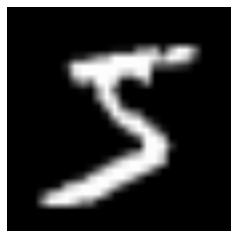

In [5]:
plt.imshow(X_train[0].reshape(28,28), cmap="gray", interpolation=None)
plt.xticks([])
plt.yticks([])
plt.show()

So: we have a total of 70,000 images, each of which is 28 pixels by 28 pixels. To simplify things a bit, we're going to do some reshaping to represent each image of an array of length 784 (that is, 28 x 28). We'll then convert each digit there into a float and divide by 255, so that we'll have values between 0 and 1 to make the math more straightforward.

In [6]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Let's look at our labels...

In [7]:
y_train.shape

(60000,)

In [8]:
y_train[0]

5

Our labels are represented as an array of integers, each of which corresponds to the digit that the image represents. That's not really what we want for our neural net, though. We're going to convert this 1-dimensional array into 10-dimensional arrays, each of which is a "one hot vector" representation -- that is, we'll have one entry for each possible class, and the class that corresponds to the ground truth will be represented with a 1. So, our first entry will be represented as [0, 0, 0, 0, 1, 0, 0, 0, 0] instead of 5.

In [9]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Now, we're ready to build the network for real. The structure here is quite simple -- we have one fully connected layer with 512 neurons with a relu activation function; then, a dropout layer which will eliminate 20% of our data; then anoter fully connectged layer with 512 neurons with relu, then another 20% dropout, then a softmax layer that will computer our labels.

In [10]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
                           
model.add(Dropout(0.2)) 
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

We'll use categorical crossentropy as our loss function and an Adam optimizer here.

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam')

... And that's all we need to set up!! We now fit our model and watch the loss drop!

In [12]:
model.fit(X_train, Y_train,
          batch_size=128, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 5s - loss: 0.2480     
Epoch 2/5
60000/60000 [==============================] - 4s - loss: 0.1013     
Epoch 3/5
60000/60000 [==============================] - 4s - loss: 0.0725     
Epoch 4/5
60000/60000 [==============================] - 4s - loss: 0.0548     
Epoch 5/5
60000/60000 [==============================] - 4s - loss: 0.0452     


OK, so we seem to be minimizing categorical cross entropy. But how are we doing in terms of actually classifying numbers??

In [13]:
predicted_classes = model.predict_classes(X_test)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print ("\n\nNumber of correct guesses: {}".format(len(correct_indices)))
print ("Number of incorrect guesses: {}".format(len(incorrect_indices)))

 9696/10000 [============================>.] - ETA: 0s

Number of correct guesses: 9825
Number of incorrect guesses: 175


Let's take a look at some of our correct and incorrect guesses to see which kind of images fooled our model...

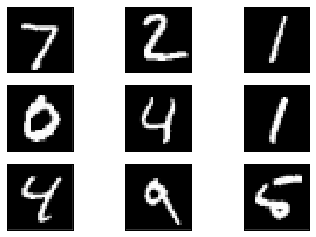

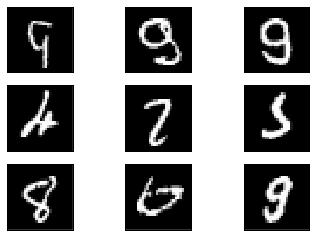

In [14]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.xticks([])
    plt.yticks([])
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.xticks([])
    plt.yticks([])

## For next time!

First, one problem with this setup is that we've kept the dropout layers for the eval step as well as training. That's not a great idea! See if you can fix this code.

We can also improve the accuracy of our neural net by adding convolutional layers. Let's try that next time!